# Mask test

## Imports and Drive mount

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#import audio_masking.py
import sys
sys.path.append('/content/gdrive/My Drive/Nagy házi/')
from audio_masking import *

In [0]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
import IPython.display

## Read two different, random utterances

In [0]:
sampleRate = 22050

x1, sr1 = librosa.load("/content/gdrive/My Drive/Nagy házi/audiobooks/utterances_5s/hardtimes_01_dickens__Kristen_Ferreri_88.wav", sr = sampleRate)
x2, sr2 = librosa.load("/content/gdrive/My Drive/Nagy házi/audiobooks/utterances_5s/hardtimes_14_dickens__Zachary_Brewster-Geisz_110.wav", sr = sampleRate)

In [6]:
IPython.display.Audio(data=x1, rate=sr1)

In [7]:
IPython.display.Audio(data=x2, rate=sr2)

In [8]:
IPython.display.Audio(data=(x1+x2), rate=sampleRate)

## Create the STFT of the WAV files

### Create the STFT and mix them

In [0]:
X1=librosa.stft(x1, n_fft=512, hop_length=256)
X2=librosa.stft(x2, n_fft=512, hop_length=256)
Ymix=X1+X2

### Inverse STFT for on the mix for testing

In [17]:
yinv=librosa.istft(Ymix, hop_length=256)
IPython.display.Audio(data=yinv, rate=sampleRate)

### Calculate masks

In [0]:
[M1, M2] = IRM([X1, X2], Y)

## Mask and data visualization

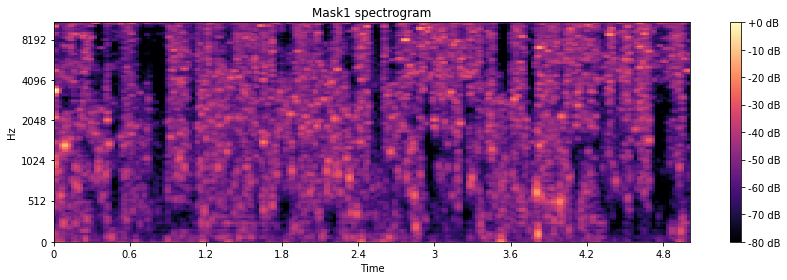

In [29]:
# Let's make and display a spectrogram of the mask
S = librosa.feature.melspectrogram(librosa.istft(M1, hop_length=256), sr=sampleRate, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sampleRate, x_axis='time', y_axis='mel')
plt.title('Mask1 spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

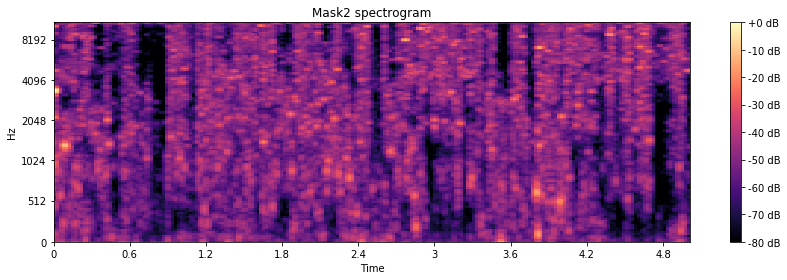

In [30]:
# Let's make and display a spectrogram of the mask
S = librosa.feature.melspectrogram(librosa.istft(M2, hop_length=256), sr=sampleRate, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sampleRate, x_axis='time', y_axis='mel')
plt.title('Mask2 spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

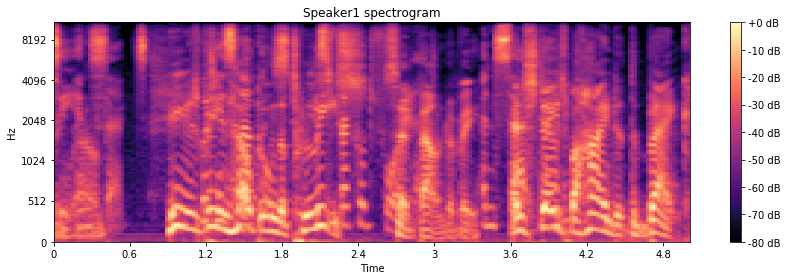

In [31]:
# Let's make and display a spectrogram of the sound file for this mask
S = librosa.feature.melspectrogram(x1+x2, sr=sampleRate, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sampleRate, x_axis='time', y_axis='mel')
plt.title('Speaker1 spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

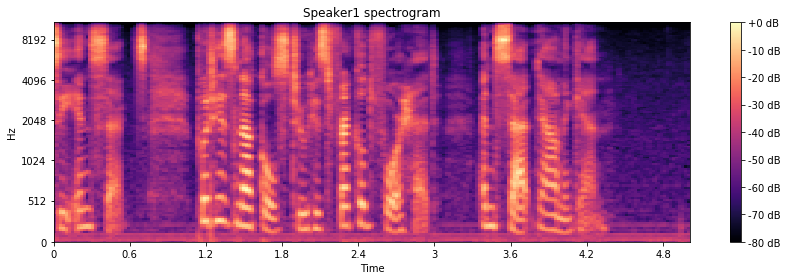

In [23]:
# Let's make and display a spectrogram of the sound file for this mask
S = librosa.feature.melspectrogram(x1, sr=sampleRate, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sampleRate, x_axis='time', y_axis='mel')
plt.title('Speaker1 spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

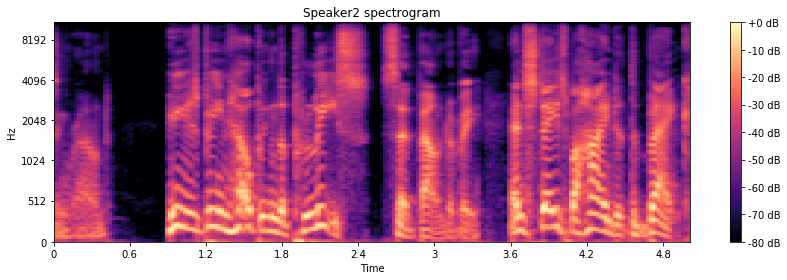

In [24]:
# Let's make and display a spectrogram of the sound file for this mask
S = librosa.feature.melspectrogram(x2, sr=sampleRate, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sampleRate, x_axis='time', y_axis='mel')
plt.title('Speaker2 spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

## Reconstruct speaker channels with masks

In [32]:
x1demix = librosa.istft(reconstructSpectrum(M1,Y), hop_length=256)
IPython.display.Audio(data=x1demix, rate=sampleRate)

In [33]:
x2demix = librosa.istft(reconstructSpectrum(M2,Y), hop_length=256)
IPython.display.Audio(data=x2demix, rate=sampleRate)

## Test other IRM function

In [0]:
[M1b, M2b] = IRMbeta([X1, X2], beta = 0.5)

In [35]:
x1BetaDemix = librosa.istft(reconstructSpectrum(M1b,Y), hop_length=256)
IPython.display.Audio(data=x1BetaDemix, rate=sampleRate)

In [36]:
x2BetaDemix = librosa.istft(reconstructSpectrum(M2b,Y), hop_length=256)
IPython.display.Audio(data=x2BetaDemix, rate=sampleRate)